In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
train

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1820,1,240,1026,1133,2,8,1925,1950,184000
1,7,1646,1,240,918,918,2,7,1941,1950,164000
2,5,1316,2,484,926,926,1,6,1929,2001,130000
3,10,2402,3,672,3094,2402,2,10,2008,2008,555000
4,7,1253,2,402,1237,1253,2,6,1995,1996,176000
...,...,...,...,...,...,...,...,...,...,...,...
1163,6,1400,2,440,672,672,1,6,1978,1978,149500
1164,7,1472,2,402,384,802,2,7,1991,1992,160000
1165,5,789,1,250,789,789,1,5,1948,1950,115000
1166,6,1661,1,377,992,1661,1,8,1955,1996,165500


In [3]:
X_train1 = train.drop(['SalePrice'], axis =1)
X_train1

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1820,1,240,1026,1133,2,8,1925,1950
1,7,1646,1,240,918,918,2,7,1941,1950
2,5,1316,2,484,926,926,1,6,1929,2001
3,10,2402,3,672,3094,2402,2,10,2008,2008
4,7,1253,2,402,1237,1253,2,6,1995,1996
...,...,...,...,...,...,...,...,...,...,...
1163,6,1400,2,440,672,672,1,6,1978,1978
1164,7,1472,2,402,384,802,2,7,1991,1992
1165,5,789,1,250,789,789,1,5,1948,1950
1166,6,1661,1,377,992,1661,1,8,1955,1996


In [4]:
y_train = train['SalePrice']
y_train

0       184000
1       164000
2       130000
3       555000
4       176000
         ...  
1163    149500
1164    160000
1165    115000
1166    165500
1167    180500
Name: SalePrice, Length: 1168, dtype: int64

In [5]:
def Z_normalise(X_train):
    mu = X_train.mean(axis = 0)
    std = np.std(X_train)
    X_train = ((X_train - mu)/std)
    return X_train

In [6]:
X_train1= Z_normalise(X_train1)
X_train1
m = len(X_train1)
X_train1

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,0.656690,0.569852,-1.045283,-1.112231,-0.069239,-0.084215,0.791680,0.928524,-1.515719,-1.677455
1,0.656690,0.237659,-1.045283,-1.112231,-0.312142,-0.638511,0.791680,0.297257,-0.988719,-1.677455
2,-0.811279,-0.392363,0.303767,0.036340,-0.294150,-0.617886,-1.050316,-0.334009,-1.383969,0.787215
3,2.858645,1.680981,1.652818,0.921305,4.581912,3.187422,0.791680,2.191057,1.218097,1.125503
4,0.656690,-0.512639,0.303767,-0.349655,0.405322,0.225160,0.791680,-0.334009,0.789909,0.545580
...,...,...,...,...,...,...,...,...,...,...
1163,-0.077295,-0.231993,0.303767,-0.170779,-0.865422,-1.272729,-1.050316,-0.334009,0.229971,-0.324303
1164,0.656690,-0.094534,0.303767,-0.349655,-1.513165,-0.937573,0.791680,0.297257,0.658159,0.352273
1165,-0.811279,-1.398488,-1.045283,-1.065159,-0.602277,-0.971089,-1.050316,-0.965276,-0.758156,-1.677455
1166,-0.077295,0.266296,-1.045283,-0.467337,-0.145709,1.277033,-1.050316,0.928524,-0.527593,0.545580


In [7]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(w, X[i])+b
        cost +=(f_wb_i - y[i]) ** 2
    cost /= (2 * m)
    return cost

In [8]:
def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        err = np.dot(X[i], w) + b - y[i]
        for j in range(n):
            dj_dw[j] += err*X[i,j]
        dj_db += err
    dj_dw /= m
    dj_db /= m
    return dj_db, dj_dw

In [9]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iter):
    J_history = []
    w = w_in
    b = b_in
    for i in range(num_iter):
        dj_db, dj_dw = compute_gradient(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i<1000000:
            J_history.append(compute_cost(X, y, w, b))
    return w, b, J_history

In [10]:
X_train = X_train1.to_numpy()
initial_w = np.zeros(10)
initial_b = 0.
iterations = 2500
alpha = 3.0e-3
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

b,w found by gradient descent: 181124.48,[26719.36615716 21621.22456582  7213.62790372  5185.63837991
  8056.03334881  6266.04110636 -2112.84890697  3590.54884005
  6904.41860589  6416.52517261] 
prediction: 177030.94, target value: 184000
prediction: 165790.48, target value: 164000
prediction: 143618.15, target value: 130000
prediction: 389261.91, target value: 555000
prediction: 198723.78, target value: 176000
prediction: 145641.12, target value: 98600
prediction: 187684.82, target value: 181000
prediction: 135453.06, target value: 138000
prediction: 131267.36, target value: 130000
prediction: 38672.19, target value: 34900
prediction: 262248.06, target value: 262000
prediction: 93601.00, target value: 105000
prediction: 111203.21, target value: 118500
prediction: 258072.30, target value: 324000
prediction: 127943.38, target value: 132500
prediction: 128469.58, target value: 144000
prediction: 192556.06, target value: 142600
prediction: 181776.23, target value: 140000
prediction: 1052

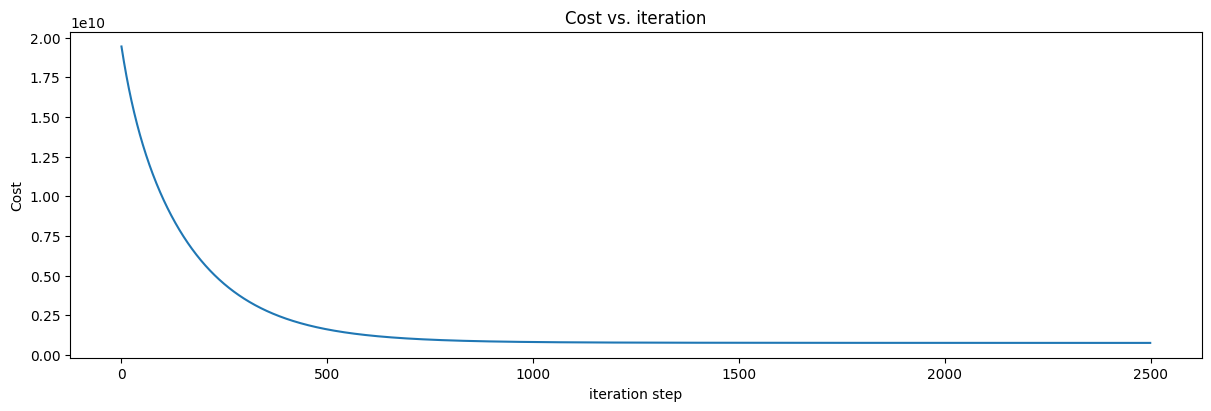

In [11]:
fig, (ax1) = plt.subplots(1, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax1.set_title("Cost vs. iteration")
ax1.set_ylabel('Cost')              
ax1.set_xlabel('iteration step')   
plt.show()

In [12]:
test = pd.read_csv('test.csv')
X_test1 = test.drop(['SalePrice'] ,  axis =1)
X_test1

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,8,1970,3,753,1085,1120,2,8,2006,2006
1,6,1632,1,338,1240,1632,2,6,1958,1988
2,7,1223,2,480,600,520,2,4,2005,2005
3,5,1559,2,812,1559,1559,1,5,1948,1973
4,4,630,1,286,630,630,1,3,1970,2002
...,...,...,...,...,...,...,...,...,...,...
287,6,1158,2,576,1158,1158,1,5,2004,2004
288,6,987,1,264,483,483,1,5,1972,2007
289,6,848,2,420,848,848,1,4,2003,2003
290,7,1266,2,388,1266,1266,2,6,2007,2007


In [13]:
X_test1= Z_normalise(X_test1)
X_test1

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,1.318348,0.902270,1.643217,1.342996,0.060459,-0.080093,0.784541,0.859200,1.143870,1.005143
1,-0.051608,0.265258,-0.957430,-0.557778,0.435406,1.265632,0.784541,-0.265851,-0.483793,0.123168
2,0.633370,-0.505564,0.342893,0.092607,-1.112763,-1.657116,0.784541,-1.390902,1.109960,0.956144
3,-0.736586,0.127679,0.342893,1.613226,1.207071,1.073761,-0.937910,-0.828376,-0.822889,-0.611811
4,-1.421564,-1.623162,-0.957430,-0.795947,-1.040193,-1.367995,-0.937910,-1.953427,-0.076877,0.809148
...,...,...,...,...,...,...,...,...,...,...
287,-0.051608,-0.628066,0.342893,0.532304,0.237047,0.019785,-0.937910,-0.828376,1.076050,0.907145
288,-0.051608,-0.950341,-0.957430,-0.896711,-1.395788,-1.754365,-0.937910,-0.828376,-0.009058,1.054141
289,-0.051608,-1.212308,0.342893,-0.182203,-0.512848,-0.795010,-0.937910,-1.390902,1.042141,0.858147
290,0.633370,-0.424524,0.342893,-0.328769,0.498300,0.303649,0.784541,-0.265851,1.177779,1.054141


In [14]:
X_test = X_test1.to_numpy()

In [15]:
y_test = test['SalePrice']
m,_ = X_test.shape
for i in range(m):
    print(f"prediction: {np.dot(X_test[i], w_final) + b_final:0.2f}, target value: {y_test[i]}")

prediction: 270435.79, target value: 281000
prediction: 181957.76, target value: 139000
prediction: 177869.58, target value: 147400
prediction: 180895.55, target value: 153500
prediction: 79689.59, target value: 86000
prediction: 109018.97, target value: 127500
prediction: 117348.27, target value: 127500
prediction: 190790.45, target value: 180000
prediction: 210781.87, target value: 178000
prediction: 160567.94, target value: 153337
prediction: 217414.97, target value: 224500
prediction: 123217.47, target value: 136500
prediction: 175284.16, target value: 143000
prediction: 144783.44, target value: 153500
prediction: 282087.21, target value: 242000
prediction: 167474.74, target value: 124900
prediction: 204372.27, target value: 215000
prediction: 230535.57, target value: 164000
prediction: 151611.54, target value: 145000
prediction: 154167.57, target value: 149300
prediction: 235116.32, target value: 172500
prediction: 269111.74, target value: 230000
prediction: 197743.13, target valu

In [16]:
from sklearn.metrics import mean_squared_error
pred = []
for i in range(m):
    pred.append((np.dot(X_test[i], w_final) + b_final))
errors = mean_squared_error(y_test, pred, squared=False)
errors /= (np.mean(y_test))
print(f'nrms error: {errors: .3f}')

nrms error:  0.184


In [18]:
from sklearn.metrics import r2_score 
r2 = r2_score(y_test, pred) 
print('r2 score for model is', 100* r2) 

r2 score for model is 81.96078850330844
